# MapReader with masking

In [ ]:
# https://github.com/maps-as-data/MapReader/blob/main/worked_examples/geospatial/context_classification_one_inch_maps/Pipeline.ipynb

In [ ]:
# requuires os opendata plan (FREE) https://osdatahub.os.uk/plans
# osdatahub library documentation https://github.com/OrdnanceSurvey/osdatahub
# data docs https://www.ordnancesurvey.co.uk/documents/apis-on-a-page.pdf

### Setup

In [ ]:
# pip install osdatahub
# conda install -c conda-forge osdatahub

You'll also need to sign-up for an account on the OS Data Hub and get an API key. If you've setup you're account and need help getting a key, try the following steps:

1. Navigate to the API Dashboard located on the top navigation bar
2. Go to My Projects
3. Click Create a new project, give your project a name, then click Create project
4. Select Add an API to this project
5. Choose the APIs you would like to use and click Done (Note: osdatahub supports the OS Features, Places, Names, Linked Identifiers, and Downloads APIs)


Free API Key:

Daily Limit: 1,000 API requests per day.
Data Limit per Request: Typically limited to 10,000 features (or 1,000 features per request for certain products like the Features API).
Rate Limiting: Maximum of 10 requests per second

## Classification Pipleine

In [1]:
from osdatahub import NGD
from osdatahub.FeaturesAPI import FeaturesAPI
from shapely.geometry import Polygon
from osdatahub.extent import Extent
from pyproj import Transformer
from osdata_utils.downloader import OSDataDownloader
from osdata_utils.products import PRODUCTS
import geopandas as gpd
import pandas as pd
import mapreader
import rasterio
from rasterio.plot import show
import os

In [2]:
from mapreader import loader

In [4]:
maps = loader("./data/6_inch_png/*png")

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
print(maps)

#images: 10

#parents: 10
map_101441205.png
map_101433939.png
map_101435751.png
map_101441217.png
map_101440983.png
map_101437696.png
map_101440431.png
map_101434269.png
map_101434323.png
map_101433990.png

#patches: 0



In [6]:
maps.add_metadata("./data/6_inch_png/metadata.csv", ignore_mismatch=True)

[INFO] Loading metadata from CSV/TSV/etc file.


In [7]:
maps.check_georeferencing()
if maps.georeferenced:
    print("Georeferencing successfully added.")
else:
    print("Georeferencing is incomplete. Verify metadata.")

Georeferencing successfully added.


In [8]:
print(maps.parents["map_101433939.png"]["coordinates"])
print(maps.parents["map_101433939.png"]["crs"])

(-0.9283447265625, 51.03275840574761, -0.85418701171875, 51.063838646941576)
EPSG:4326


In [9]:
maps_list = maps.list_parents()
maps_list

['map_101441205.png',
 'map_101433939.png',
 'map_101435751.png',
 'map_101441217.png',
 'map_101440983.png',
 'map_101437696.png',
 'map_101440431.png',
 'map_101434269.png',
 'map_101434323.png',
 'map_101433990.png']

In [ ]:
dir(maps)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_center_coord_id',
 '_add_coord_increments_id',
 '_add_coords_from_grid_bb_id',
 '_add_geo_info_id',
 '_add_parent_polygons_id',
 '_add_patch_coords_id',
 '_add_patch_polygons_id',
 '_add_patch_to_parent',
 '_add_shape_id',
 '_calc_pixel_height_width',
 '_check_image_mode',
 '_convert_image_path',
 '_get_tree_level',
 '_images_constructor',
 '_infer_parent_coords_from_patches_id',
 '_make_dir',
 '_patchify_by_pixel',
 '_patchify_by_pixel_square',
 '_print_if_verbose',
 '_resolve_file_path',
 '_save_parent_as_geotiff',
 '_save_patch_as_geotiff',
 'add_center_coord',
 'add_coord_increments'

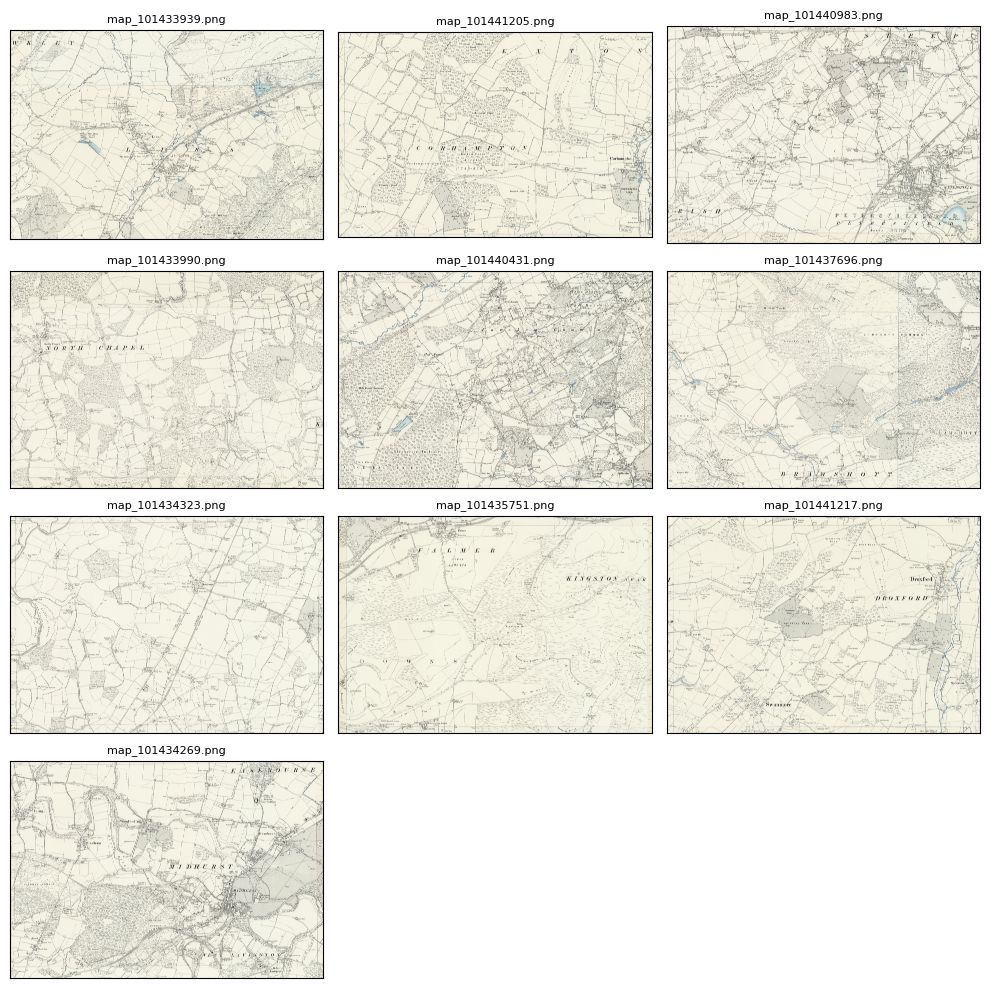

In [25]:
maps.show_sample(tree_level="parent", num_samples=10, figsize=(10, 10))

#### Save as geotiff espg 27700 to work with OS masks

In [11]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

for parent_id in maps.list_parents():
    coords = maps.parents[parent_id]["coordinates"]
    xmin, ymin, xmax, ymax = coords
    new_coords = transformer.transform_bounds(xmin, ymin, xmax, ymax)
    maps.parents[parent_id]["coordinates"] = new_coords
    maps.parents[parent_id]["crs"] = "EPSG:27700"

In [12]:
print(maps.parents["map_101433939.png"]["coordinates"])
print(maps.parents["map_101433939.png"]["crs"])

(475192.11939070607, 126479.01303338609, 480442.2872536591, 130013.4650072022)
EPSG:27700


In [13]:
# Save parent images as GeoTIFFs with CRS EPSG:27700
maps.save_parents_as_geotiffs(rewrite=True, verbose=True, crs="EPSG:27700")

  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101441205.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101433939.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101435751.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101441217.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101440983.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101437696.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101440431.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101434269.tif.
[INFO] Creating: /home/david/Documents/GitHub/MapReader/testing_notebooks/data/6_inch_png/map_101434323.tif.
[INFO] Creating: /h

## OS Downloader

In [53]:
# Use OSDataDownloader to Query OS Data
api_key = "oX1WR2nDOAzhICIRNQWhAhBP2mtQp8I8"  # Replace with your API key
downloader = OSDataDownloader(api_key)

# Directory to store GeoJSONs
output_dir = "./output_geojsons/"
os.makedirs(output_dir, exist_ok=True)

In [54]:
tiff_path = "./data/6_inch_png/map_101433939.tif"
products_to_query = [
    "zoomstack_local_buildings",
    "zoomstack_roads_local",
    "zoomstack_roads_national",
    "zoomstack_roads_regional",
    "zoomstack_district_buildings",
    "zoomstack_rail",
]  # Use full keys

gdfs = {}
for product_key in products_to_query:
    product_info = PRODUCTS.get(product_key)
    if product_info is None:
        print(f"Product key '{product_key}' not found in PRODUCTS dictionary.")
        continue

    product_name = product_key  # Use the dictionary key as the product name
    print(f"Querying product: {product_name}")
    try:
        gdf = downloader.download_os_data(
            tiff_path=tiff_path,
            product_name=product_name,
            output_file=None,
        )
        if gdf is not None:
            gdfs[product_key] = gdf
            gdf_file = os.path.join(output_dir, f"{product_key}.geojson")
            gdf.to_file(gdf_file, driver="GeoJSON")
            print(f"Saved {product_key} data to {gdf_file}")
    except Exception as e:
        print(f"Error querying {product_name}: {e}")

Querying product: zoomstack_local_buildings
Saved zoomstack_local_buildings data to ./output_geojsons/zoomstack_local_buildings.geojson
Querying product: zoomstack_roads_local
Saved zoomstack_roads_local data to ./output_geojsons/zoomstack_roads_local.geojson
Querying product: zoomstack_roads_national
Saved zoomstack_roads_national data to ./output_geojsons/zoomstack_roads_national.geojson
Querying product: zoomstack_roads_regional
Saved zoomstack_roads_regional data to ./output_geojsons/zoomstack_roads_regional.geojson
Querying product: zoomstack_district_buildings
Saved zoomstack_district_buildings data to ./output_geojsons/zoomstack_district_buildings.geojson
Querying product: zoomstack_rail
Saved zoomstack_rail data to ./output_geojsons/zoomstack_rail.geojson


In [55]:
# Optional - Combine and Plot Results
if gdfs:
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs.values(), ignore_index=True))
    combined_gdf.to_file("./output_geojsons/combined_data.geojson", driver="GeoJSON")
    print("Saved combined GeoDataFrame to ./output_geojsons/combined_data.geojson")

Saved combined GeoDataFrame to ./output_geojsons/combined_data.geojson


## Geosptial Mask function for mapreader source code

In [47]:
import rasterio
from rasterio.features import geometry_mask
import geopandas as gpd
import numpy as np
from shapely.geometry import box


def apply_mask_to_raster(
    input_tif, gdf, output_tif, mask_color="white", buffer_distance=0
):
    """
    Apply a geospatial mask to a GeoTIFF file based on a GeoDataFrame, clipping geometries to the raster bounds.

    Parameters:
    - input_tif (str): Path to the input GeoTIFF file.
    - gdf (geopandas.GeoDataFrame): GeoDataFrame containing geometries to mask.
    - output_tif (str): Path to save the masked GeoTIFF.
    - mask_color (str): Color of the mask, either "white" or "black". Defaults to "white".
    - buffer_distance (float): Buffer distance in meters for polylines. Defaults to 0 (no buffering).

    Returns:
    - None
    """
    # Validate mask_color
    if mask_color not in ["white", "black"]:
        raise ValueError("mask_color must be either 'white' or 'black'")

    with rasterio.open(input_tif) as src:
        # Ensure GeoDataFrame has the same CRS as the raster
        gdf = gdf.to_crs(src.crs)

        # Validate and fix invalid geometries
        gdf["geometry"] = gdf["geometry"].apply(
            lambda geom: geom.buffer(0) if not geom.is_valid else geom
        )

        # Create the raster's bounding box as a shapely box geometry
        raster_bounds = box(*src.bounds)

        # Clip geometries to the raster's bounding box
        raster_bbox = gpd.GeoDataFrame(
            {"geometry": [raster_bounds]},
            crs=src.crs,
        )
        gdf = gpd.clip(gdf, raster_bbox)

        # Apply buffer to polylines if buffer_distance > 0
        if buffer_distance > 0:
            gdf["geometry"] = gdf.geometry.apply(
                lambda geom: geom.buffer(buffer_distance)
                if geom.geom_type in ["LineString", "MultiLineString"]
                else geom
            )

        # Explode MultiPolygons into individual polygons
        gdf = gdf.explode(index_parts=False)

        # Read the input raster
        raster_data = src.read()
        transform = src.transform
        out_meta = src.meta.copy()

        # Create the mask for all geometries
        all_masks = np.zeros((src.height, src.width), dtype=bool)
        for geom in gdf.geometry:
            mask = geometry_mask(
                [geom],
                transform=transform,
                invert=True,
                out_shape=(src.height, src.width),
            )
            all_masks = np.logical_or(all_masks, mask)

        # Prepare the masked raster
        masked_raster = np.copy(raster_data)
        fill_value = 255 if mask_color == "white" else 0

        # Apply the mask to all bands
        for band in range(masked_raster.shape[0]):
            masked_raster[band][all_masks] = fill_value

        # Write the output GeoTIFF
        with rasterio.open(output_tif, "w", **out_meta) as dst:
            dst.write(masked_raster)

    print(f"Masked GeoTIFF saved to {output_tif}")

In [56]:
# Example Usage
if __name__ == "__main__":
    # Paths to files
    input_tif_path = "./data/6_inch_png/map_101433939.tif"
    combined_gdf_path = "./output_geojsons/combined_data.geojson"
    output_tif_path = "./output/masked_map_101433939.tif"

    # Load the GeoDataFrame
    combined_gdf = gpd.read_file(combined_gdf_path)

    # Apply mask to raster with buffering for polylines
    apply_mask_to_raster(
        input_tif=input_tif_path,
        gdf=combined_gdf,
        output_tif=output_tif_path,
        mask_color="white",
        buffer_distance=20,  # Buffer polylines by 20 meters
    )

Masked GeoTIFF saved to ./output/masked_map_101433939.tif


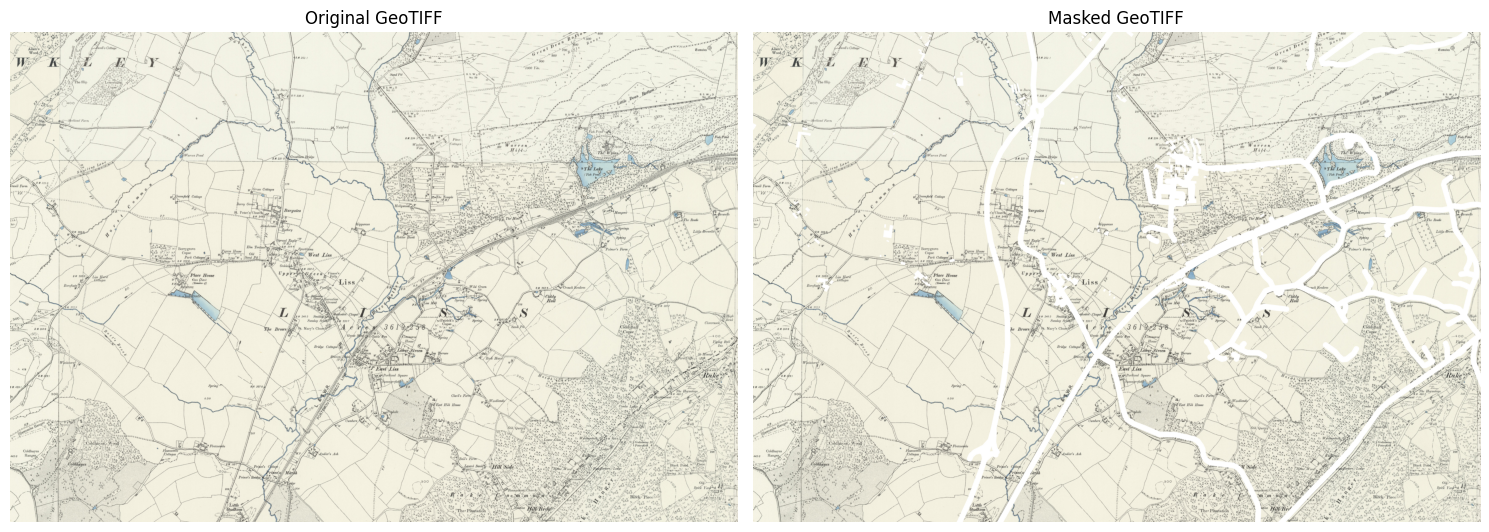

In [11]:
# plot the tifs to take a look
def plot_tiffs_side_by_side(input_tif_path, output_tif_path):
    """
    Plot the input and output GeoTIFFs side by side for comparison.

    Parameters:
    - input_tif_path (str): Path to the original GeoTIFF.
    - output_tif_path (str): Path to the masked GeoTIFF.

    Returns:
    - None
    """
    with rasterio.open(input_tif_path) as src_input, rasterio.open(
        output_tif_path
    ) as src_output:
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))

        # Plot the original GeoTIFF
        axs[0].set_title("Original GeoTIFF")
        show(src_input, ax=axs[0], cmap="gray")
        axs[0].axis("off")

        # Plot the masked GeoTIFF
        axs[1].set_title("Masked GeoTIFF")
        show(src_output, ax=axs[1], cmap="gray")
        axs[1].axis("off")

        plt.tight_layout()
        plt.show()


# Call the function to plot side by side
plot_tiffs_side_by_side(input_tif_path, output_tif_path)

## Test with a random shapefile and multishapefile

Masked GeoTIFF saved to ./output/masked_map_random_box_multi.tif


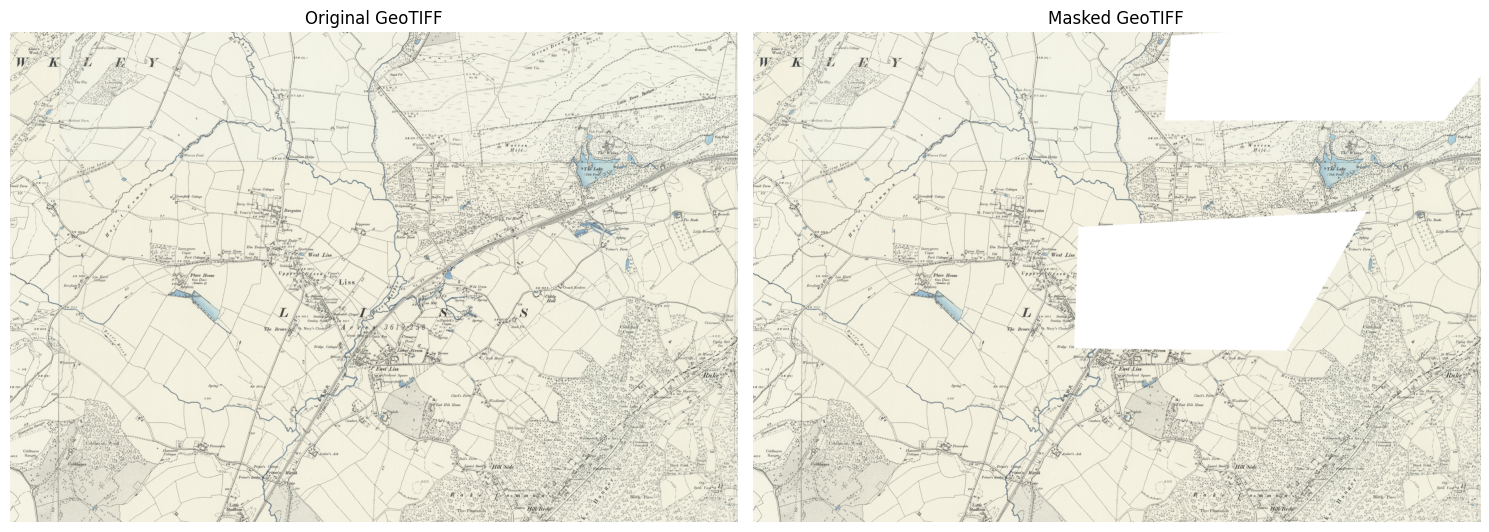

In [50]:
apply_mask_to_raster(
    input_tif="./data/6_inch_png/map_101433939.tif",
    gdf=gpd.read_file("./output_shapefiles/random_box_multi.shp"),
    output_tif="./output/masked_map_random_box_multi.tif",
    mask_color="white",
    buffer_distance=0,  # No buffer in this case
)


# Now you can plot using the intended name
plot_tiffs_side_by_side(
    "./data/6_inch_png/map_101433939.tif", "./output/masked_map_random_box_multi.tif"
)

Masked GeoTIFF saved to ./output/masked_map_101433939_single.tif
Masked GeoTIFF for ./output_shapefiles/random_box.shp saved to: ./output/masked_map_101433939_single.tif


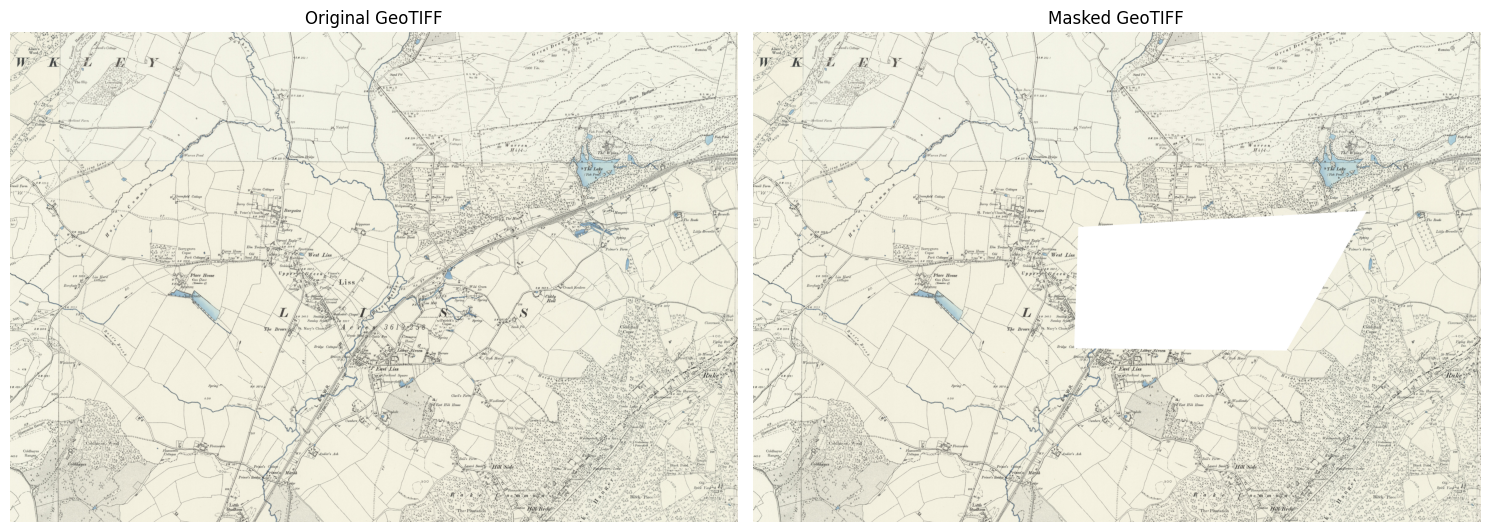

In [51]:
# Paths for the second shapefile
input_tif_path = "./data/6_inch_png/map_101433939.tif"
shapefile_path_single = "./output_shapefiles/random_box.shp"
output_tif_path_single = "./output/masked_map_101433939_single.tif"

# Load the GeoDataFrame for the second shapefile
gdf_single = gpd.read_file(shapefile_path_single)

# Apply mask to raster with buffering for polylines
apply_mask_to_raster(
    input_tif=input_tif_path,
    gdf=gdf_single,
    output_tif=output_tif_path_single,
    mask_color="white",
    buffer_distance=0,  # Buffer polylines by 20 meters
)

print(f"Masked GeoTIFF for {shapefile_path_single} saved to: {output_tif_path_single}")

# Plot the input and output rasters side by side
plot_tiffs_side_by_side(input_tif_path, output_tif_path_single)


---

# `apply_mask_to_raster` Function Documentation

## Overview
The `apply_mask_to_raster` function applies a geospatial mask to a raster file using geometries provided in a `GeoDataFrame`. It supports optional buffering for polylines and ensures that geometries are clipped to the raster's bounding box.

## Features
- Masks raster data using polygons, polylines, or multipolygons.
- Automatically validates and fixes invalid geometries in the input data.
- Buffers polylines by a user-defined distance (in meters).
- Clips geometries to the raster's bounding box to avoid topology errors.
- Supports white or black masking.

---

## Function Signature

```python
def apply_mask_to_raster(input_tif, gdf, output_tif, mask_color="white", buffer_distance=0):
    """
    Apply a geospatial mask to a GeoTIFF file based on a GeoDataFrame, clipping geometries to the raster bounds.

    Parameters:
    - input_tif (str): Path to the input GeoTIFF file.
    - gdf (geopandas.GeoDataFrame): GeoDataFrame containing geometries to mask.
    - output_tif (str): Path to save the masked GeoTIFF.
    - mask_color (str): Color of the mask, either "white" or "black". Defaults to "white".
    - buffer_distance (float): Buffer distance in meters for polylines. Defaults to 0 (no buffering).

    Returns:
    - None
    """
```

---

## Parameters
| Parameter       | Type                     | Description                                                                                       | Default Value |
|-----------------|--------------------------|---------------------------------------------------------------------------------------------------|---------------|
| `input_tif`     | `str`                    | Path to the input GeoTIFF file.                                                                  | Required      |
| `gdf`           | `geopandas.GeoDataFrame` | GeoDataFrame containing the geometries to be applied as a mask.                                  | Required      |
| `output_tif`    | `str`                    | Path where the masked GeoTIFF will be saved.                                                     | Required      |
| `mask_color`    | `str`                    | Color of the mask. Options: `"white"` or `"black"`.                                               | `"white"`     |
| `buffer_distance` | `float`                 | Buffer distance in meters for polylines. Set to `0` for no buffering.                            | `0`           |

---

## Features in Detail

### 1. **Geometry Validation**
The function checks if geometries in the input `GeoDataFrame` are valid. If invalid geometries are found, they are fixed using the `buffer(0)` method.

### 2. **Clipping to Raster Bounds**
The function ensures that geometries outside the bounds of the raster are clipped using the bounding box of the raster. This avoids topology errors and ensures only relevant geometries are used.

### 3. **Buffering Polylines**
If `buffer_distance > 0`, polylines (`LineString` or `MultiLineString`) are buffered by the specified distance and converted into polygons.

### 4. **Mask Application**
The function creates a mask based on the input geometries and applies it to all bands of the raster. The mask color can be white (`255`) or black (`0`).

---

## Example Usage

### Basic Usage
```python
apply_mask_to_raster(
    input_tif="./data/6_inch_png/map_101433939.tif",
    gdf=gpd.read_file("./output_shapefiles/random_box_multi.shp"),
    output_tif="./output/masked_map_random_box_multi.tif",
    mask_color="white",
    buffer_distance=0,  # No buffering
)
```

### Advanced Usage with Buffering
```python
apply_mask_to_raster(
    input_tif="./data/6_inch_png/map_101433939.tif",
    gdf=gpd.read_file("./output_shapefiles/random_box_multi.shp"),
    output_tif="./output/masked_map_random_box_buffered.tif",
    mask_color="black",
    buffer_distance=20,  # Buffer polylines by 20 meters
)
```

---

## Error Handling
1. **Invalid `mask_color`**: If the `mask_color` is not `"white"` or `"black"`, the function raises a `ValueError`.
2. **Invalid Geometries**: The function automatically fixes invalid geometries in the input `GeoDataFrame`.
3. **Topology Errors**: By clipping geometries to the raster bounds, the function prevents topology-related errors during masking.

---

## Output
- **Masked Raster**: A new GeoTIFF file with the applied mask is saved to the specified `output_tif` path.
- The mask is applied to all bands in the raster, preserving the original raster metadata.

---

## Troubleshooting
1. **Single Polygon in Output**:
   - Ensure that all geometries in the `GeoDataFrame` are valid and properly clipped to the raster bounds.
   - Check if multiple polygons overlap or are reduced due to buffering.

2. **Topology Errors**:
   - Ensure that the `GeoDataFrame` CRS matches the CRS of the raster.
   - Validate and repair geometries before applying the mask.

---

## Visualizing Results
To visualize the results, use the `plot_tiffs_side_by_side` helper function:
```python
plot_tiffs_side_by_side(
    input_tif_path="./data/6_inch_png/map_101433939.tif",
    output_tif_path="./output/masked_map_random_box_multi.tif"
)
```

This plots the original and masked raster side by side for comparison.

--- 